In [1]:
%cd /om2/vast/cbmm/xboix/src/Robustness

/om2/vast/cbmm/xboix/src/Robustness


In [2]:
experiment_name = "vision_old"
results_dir = '/vast/robustness/' + experiment_name + '/'

In [3]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_context("poster")

import matplotlib.pyplot as plt
import pandas as pd
import pickle 
import os 

import numpy as np
import pandas
    
import runs.config_experiments_vision as run
experiment_list = run.config_experiments(results_dir, create_json=False)

4705 config files created


In [4]:
name_attacks = ["linf_pgd", "l2_pgd", "linf_fgsm", "l2_fgm"]

In [5]:

list_entries = []

for net in ['ThreeLayer', 'CNN']:
    for dataset_id in [0,66,67]:

        for attack in name_attacks:

            file_name = results_dir + experiment_list[0]['model_name'] + '/results/acc_' + 'val' + '_' + attack + '.pkl'
            if not os.path.isfile(file_name):
                print("Missing!! " + file_name)
                continue
            with open(file_name, 'rb') as f:
                tmp = pickle.load(f)


            for cv_epsilon in list(tmp.keys()):
                # Hash table of parameters
                parameters = {"epsilon": {}, "backbone": {}, "initial_learning_rate": {}, 
                              "robust_training": {}, "type_robust": {}, "epsilon_pgd_training":{}}

                to_exclude = []
                experiment_list_tmp = [element for i, element in enumerate(experiment_list) if i not in to_exclude]
                for exp in experiment_list_tmp:
                    if not exp['data_set'] == dataset_id: 
                        continue
                    for kk in parameters.keys():
                        if exp[kk] in parameters[kk]:
                            parameters[kk][exp[kk]].append(int(exp["model_name"]))
                        else:
                            parameters[kk][exp[kk]] = [int(exp["model_name"])]


                # For all methods, do cross-val and create an entry of the results
                backbones = [net, net + '+pgd']



                for backbone in backbones:
                    for robust_training in [True, False]:
                        if robust_training:
                            type_robust_trainings = ['linf','l1',"certificate"]
                        else:
                            type_robust_trainings = ['none']
                        for type_robust in type_robust_trainings:

                            if (backbone == 'Madry' and robust_training == True) or \
                                (backbone == 'CNN+clipping' and robust_training == False):
                                continue

                            if robust_training==False:
                                ids = list(set(parameters["backbone"][backbone]) & 
                                           set(parameters["robust_training"][False]))
                            else:
                                ids = list(set(parameters["backbone"][backbone]) & 
                                       set(parameters["robust_training"][True])&
                                      set(parameters["type_robust"][type_robust]))



                            if backbone == net + '+pgd' and robust_training == True:
                                continue

                            if ids == []:
                                continue
                            #print(ids)


                            # Cross-validation among learning rates and epsilons:
                            best_acc = -1
                            best_id = ids[0]
                            for id in ids:
                                file_name = results_dir + experiment_list[id]['model_name'] + '/results/acc_' + 'val' + '_' + attack + '.pkl'
                                if not os.path.isfile(file_name):
                                    print("Missing!! " + file_name)
                                    continue

                                with open(file_name, 'rb') as f:
                                    tmp = pickle.load(f)

                                acc = tmp[cv_epsilon]
                                if acc>best_acc:
                                    best_id = id
                                    best_acc = acc

                            if best_acc == -1:
                                continue

                            if (robust_training == False) & (backbone==net):  
                                name_legend = 'vanilla'
                            elif backbone== net + '+pgd':
                                name_legend = 'pgd'
                            else:
                                if type_robust=='certificate':
                                    name_legend = 'RUB'
                                elif type_robust=='linf':
                                    name_legend = 'aRUB_Linf'
                                else:
                                    name_legend = 'aRUB_L1'

                            entry = {"learning_rate": experiment_list[best_id]['initial_learning_rate'],
                                     "net": net,
                                     "dataset": dataset_id,
                                    #"backbone": experiment_list[best_id]['backbone'],
                                    "robust_training": name_legend,
                                    "epsilon": experiment_list[best_id]['epsilon'],
                                    "epsilon_pgd_training": experiment_list[best_id]['epsilon_pgd_training']}

                            dataset = "test"
                            entry["attack"] = attack
                            entry["experiment_id"] = best_id

                            with open(results_dir + experiment_list[best_id]['model_name'] + '/results/acc_' + dataset + '_' + 
                                attack + '.pkl', 'rb') as f:
                                tmp = pickle.load(f)

                            entry["test_epsilon"] = cv_epsilon
                            entry["accuracy"] =  100*tmp[cv_epsilon]
                            
                            with open(results_dir + experiment_list[best_id]['model_name'] + 
                                          '/results/training_time.pkl', 'rb') as f:
                                tmp = pickle.load(f)
                                entry["images_per_second"] = np.mean(tmp) 
                                entry["std_images_per_second"] = np.std(tmp) 

                            #with open(results_dir + experiment_list[best_id]['model_name'] + '/results/acc_' + 'test' + '_' + 
                            #        'bound' + '.pkl', 'rb') as f:
                            #    tmp = pickle.load(f)
                            #if type_robust == 'certificate':
                            #    print(tmp)
                            #entry["bound"] =  100*tmp[cv_epsilon]
                            list_entries.append(entry.copy())

df_results = pd.DataFrame.from_dict(list_entries) 


Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1197/results/

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1197/results/

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1197/results/

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1197/results/

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1197/results/

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1197/results/

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1197/results/

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1197/results/

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1197/results/

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1197/results/

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1197/results/

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1197/results/

Missing!! /vast/robustness/vision_old/1184/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1197/results/

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1229/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1230/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1231/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1232/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1233/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1234/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1235/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1236/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1237/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1238/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1239/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1240/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1241/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1242/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1183/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1184/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1185/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1186/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1187/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1188/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1189/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1190/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1191/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1192/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1193/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1194/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1195/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1196/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1197/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1884/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1884/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1884/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1884/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1884/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1884/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1884/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/1569/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1815/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1816/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1817/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1818/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1819/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1820/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1884/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1884/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1884/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1884/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1884/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1884/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1814/results/

Missing!! /vast/robustness/vision_old/1884/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1814/results/

Missing!! /vast/robustness/vision_old/1884/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1814/results/

Missing!! /vast/robustness/vision_old/1884/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1814/results/

Missing!! /vast/robustness/vision_old/1884/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1814/results/

Missing!! /vast/robustness/vision_old/1884/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1814/results/

Missing!! /vast/robustness/vision_old/1884/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/1814/results/

Missing!! /vast/robustness/vision_old/1569/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1815/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1816/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1817/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1818/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1819/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1820/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1884/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1884/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1884/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1884/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/1884/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1885/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1886/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1887/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1888/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1889/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1569/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1570/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1571/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1572/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1573/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1574/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1813/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/1814/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/2199/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2200/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2201/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2202/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2203/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2204/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2199/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2200/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2201/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2202/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2203/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2204/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2199/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2200/results/acc_val_linf_

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Missing!! /vast/robustness/vision_old/2199/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2200/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2201/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2202/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2203/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2204/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2199/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2200/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2201/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2202/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2203/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2204/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2199/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2200/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/2199/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2200/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2201/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2202/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2203/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2204/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2199/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2200/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2201/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2202/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2203/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2204/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2199/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2200/results/

Missing!! /vast/robustness/vision_old/2199/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2200/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2201/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2202/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2203/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2204/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2199/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2200/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2201/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2202/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2203/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2204/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2199/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2200/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3844/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3845/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3853/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3854/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3855/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3856/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3857/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3883/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3884/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3885/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3886/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3887/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3888/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3889/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3890/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3891/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3892/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3893/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3894/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3895/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3896/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3844/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3845/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3853/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3854/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3855/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3856/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3857/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3844/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3845/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3853/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3854/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3855/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3856/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3857/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3844/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3845/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3853/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3854/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3855/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3856/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3857/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3845/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3853/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3854/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3855/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3856/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3857/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3858/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3845/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3853/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3854/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3855/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3856/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3857/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3858/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3844/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3845/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3853/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3854/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3855/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3856/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3857/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3844/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3845/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3853/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3854/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3855/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3856/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3857/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3844/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3845/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3853/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3854/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3855/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3856/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3857/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3884/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3885/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3886/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3887/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3888/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3889/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3890/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3891/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3892/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3893/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3894/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3895/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3896/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3897/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3767/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3768/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3769/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3770/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3771/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3772/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3773/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3774/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3775/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3776/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3777/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3778/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3779/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3780/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3767/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3768/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3769/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3770/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3771/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3772/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3773/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3774/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3775/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3776/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3777/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3778/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3779/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3780/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3844/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3845/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3853/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3854/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3855/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3856/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3857/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3536/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3537/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3538/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3539/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3540/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3541/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3542/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3543/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3544/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3545/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3546/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3547/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3548/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3549/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/2509/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2510/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2511/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2512/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2513/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3844/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3845/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3844/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3845/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3853/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3854/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3855/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3856/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3857/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3883/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3884/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3885/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3886/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3887/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3888/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3889/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3890/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3891/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3892/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3893/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3894/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3895/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3896/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3767/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3768/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3769/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3770/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3771/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3772/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3773/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3774/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3775/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3776/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3777/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3778/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3779/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3780/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3584/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3585/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3586/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3587/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3588/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3589/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3590/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3591/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3592/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3593/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3594/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3595/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3596/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3597/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3536/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3537/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3538/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3539/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3540/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3541/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3542/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3543/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3544/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3545/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3546/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3547/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3548/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3549/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3537/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3538/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3539/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3540/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3541/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3542/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3543/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3544/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3545/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3546/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3547/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3548/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3549/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3550/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3536/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3537/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3538/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3539/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3540/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3541/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3542/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3543/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3544/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3545/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3546/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3547/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3548/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3549/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3613/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3614/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3615/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3616/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3617/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3618/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3619/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3620/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3621/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3622/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3623/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3624/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3625/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3626/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3536/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3537/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3538/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3539/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3540/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3541/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3542/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3543/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3544/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3545/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3546/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3547/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3548/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3549/results/

Missing!! /vast/robustness/vision_old/3844/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3845/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3853/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3854/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3855/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3856/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3857/results/

Missing!! /vast/robustness/vision_old/3584/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3585/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3586/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3587/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3588/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3589/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3590/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3591/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3592/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3593/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3594/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3595/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3596/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3597/results/

Missing!! /vast/robustness/vision_old/3536/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3537/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3538/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3539/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3540/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3541/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3542/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3543/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3544/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3545/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3546/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3547/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3548/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3549/results/

Missing!! /vast/robustness/vision_old/3575/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3576/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3577/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3578/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3579/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3580/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3581/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3582/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3583/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3613/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3614/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3615/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3616/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3617/results/

Missing!! /vast/robustness/vision_old/2443/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2444/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2445/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2446/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2447/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2448/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2449/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2450/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2451/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2452/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2453/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2454/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2455/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2456/results/

Missing!! /vast/robustness/vision_old/3668/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3669/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3670/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3671/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3672/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3673/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3674/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3675/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3676/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3677/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3678/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3679/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3680/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3681/results/

Missing!! /vast/robustness/vision_old/3844/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3845/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3853/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3854/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3855/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3856/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3857/results/

Missing!! /vast/robustness/vision_old/3767/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3768/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3769/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3770/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3771/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3772/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3773/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3774/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3775/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3776/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3777/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3778/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3779/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3780/results/

Missing!! /vast/robustness/vision_old/3767/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3768/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3769/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3770/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3771/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3772/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3773/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3774/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3775/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3776/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3777/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3778/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3779/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3780/results/

Missing!! /vast/robustness/vision_old/3536/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3537/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3538/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3539/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3540/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3541/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3542/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3543/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3544/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3545/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3546/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3547/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3548/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3549/results/

Missing!! /vast/robustness/vision_old/2466/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2467/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2468/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2469/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2470/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2471/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2472/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2473/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2474/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2475/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2476/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2477/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2478/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2479/results/

Missing!! /vast/robustness/vision_old/3536/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3537/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3538/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3539/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3540/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3541/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3542/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3543/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3544/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3545/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3546/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3547/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3548/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3549/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3844/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3845/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3853/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3854/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3855/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3856/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3857/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3787/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3788/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3789/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3790/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3791/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3792/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3793/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3794/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3795/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3796/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3797/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3798/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3799/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3800/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3536/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3537/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3538/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3539/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3540/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3541/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3542/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3543/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3544/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3545/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3546/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3547/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3548/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3549/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3844/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3845/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3846/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3847/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3848/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3849/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3850/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3851/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3852/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3853/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3854/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3855/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3856/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3857/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3767/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3768/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3769/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3770/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3771/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3772/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3773/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3774/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3775/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3776/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3777/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3778/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3779/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3780/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3536/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3537/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3538/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3539/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3540/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3541/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3542/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3543/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3544/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3545/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3546/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3547/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3548/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3549/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3614/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3615/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3616/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3617/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3618/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3619/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3620/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3621/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3622/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3623/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3624/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3625/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3626/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3627/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3616/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3617/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3618/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3619/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3620/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3621/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3622/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3623/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3624/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3625/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3626/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3627/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3628/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3629/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3651/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3652/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3653/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3654/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3655/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3656/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3657/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3658/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3659/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3660/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3661/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3662/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3663/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3664/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3634/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3635/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3636/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3637/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3638/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3639/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3640/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3641/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3642/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3643/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3644/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3645/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3646/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3647/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3536/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3537/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3538/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3539/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3540/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3541/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3542/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3543/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3544/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3545/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3546/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3547/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3548/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3549/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/2761/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2762/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2763/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2764/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2765/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2766/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2767/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2768/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2769/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2770/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2771/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2772/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2773/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2774/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3118/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3119/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3120/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3121/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3122/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3123/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3124/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3125/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3126/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3127/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3128/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3129/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3130/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3131/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/2758/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2759/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2760/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2761/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2762/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2763/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2764/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2765/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2766/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2767/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2768/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2769/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2770/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2771/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/4189/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4190/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4191/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4192/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4193/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4194/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4195/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4196/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4197/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4198/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4199/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4200/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4201/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4202/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/4242/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4243/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4244/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4245/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4246/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4247/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4248/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4249/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4250/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4251/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4252/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4253/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4254/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4255/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/2896/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2897/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2898/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2899/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2900/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2901/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2902/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2903/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2904/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2905/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4005/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4006/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4007/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4008/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/2758/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2759/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2760/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2761/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2762/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2763/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2764/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2765/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2766/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2767/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2768/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2769/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2770/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2771/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/2813/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2814/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2815/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2816/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2817/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2818/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2819/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2820/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2821/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2822/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2823/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2824/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2825/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2826/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/2850/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2851/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2852/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2853/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2854/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2855/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2856/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2857/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2858/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2859/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2860/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2861/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2862/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/2863/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/2771/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2772/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2773/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2774/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2775/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2776/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2777/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2778/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2779/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2780/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2781/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2782/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2783/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2784/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3974/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3975/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3976/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3977/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3978/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3979/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3980/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3981/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3982/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3983/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3984/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3985/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3986/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3987/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/2884/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2885/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2886/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2887/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2888/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2889/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2890/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2891/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2892/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2893/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2894/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2895/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2896/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/2897/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/4062/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4063/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4064/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4065/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4066/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4067/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4068/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4069/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4070/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4071/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4072/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4073/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4074/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4075/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3073/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3074/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3075/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3076/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3077/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3078/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3079/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3080/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3081/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3082/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3083/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3084/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3085/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3086/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/4306/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4307/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4308/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4309/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4310/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4311/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4312/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3060/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3061/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3062/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3063/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3064/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3065/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3066/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3090/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3091/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3092/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3093/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3094/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3095/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3096/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3097/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3098/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3099/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3100/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3101/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3102/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3103/results/

Missing!! /vast/robustness/vision_old/4047/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4048/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4049/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4050/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4051/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4052/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4053/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4054/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4055/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4056/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4057/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4058/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4059/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4060/results/

Missing!! /vast/robustness/vision_old/4301/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4302/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4303/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4304/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4305/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4306/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4307/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4308/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4309/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4310/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4311/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4312/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3060/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3061/results/

Missing!! /vast/robustness/vision_old/3051/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3052/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3053/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3054/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3055/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3056/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3057/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3058/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3059/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2758/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2759/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2760/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2761/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2762/results/

Missing!! /vast/robustness/vision_old/3999/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4000/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4001/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4002/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4003/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4004/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2829/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2830/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2831/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2832/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2833/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2834/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2835/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/2836/results/

Missing!! /vast/robustness/vision_old/3075/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3076/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3077/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3078/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3079/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3080/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3081/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3082/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3083/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3084/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3085/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3086/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3087/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3088/results/

Missing!! /vast/robustness/vision_old/2857/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2858/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2859/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2860/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2861/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2862/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2863/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2864/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2865/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2866/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2867/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2868/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2869/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2870/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/2758/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2759/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2760/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2761/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2762/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2763/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2764/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2765/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2766/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2767/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2768/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2769/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2770/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2771/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/2758/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2759/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2760/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2761/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2762/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2763/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2764/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2765/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2766/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2767/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2768/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2769/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2770/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/2771/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/4159/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4160/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4161/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4162/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4163/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4164/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4165/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4166/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4167/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4168/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4169/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4170/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4171/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4172/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/4198/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4199/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4200/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4201/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4202/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4203/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4204/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4205/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4206/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4207/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4208/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4209/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4210/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4211/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3015/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3016/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3017/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3018/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3019/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3020/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3021/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3022/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3023/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3024/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3025/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3026/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3027/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3028/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/4168/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4169/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4170/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4171/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4172/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4173/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4174/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4175/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4176/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4177/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4178/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4179/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4180/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4181/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3202/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3203/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3204/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3205/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3206/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3207/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3208/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3209/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3210/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3211/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3212/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3213/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3214/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3215/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3513/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3514/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3515/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3516/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3517/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3518/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3519/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3520/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3521/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3522/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3523/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3524/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3525/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3526/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3426/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3427/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3428/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3429/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3430/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3431/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3432/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3433/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3434/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3435/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3436/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3437/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3438/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3439/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3383/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3384/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3385/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3386/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3387/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3388/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3389/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3390/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3391/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3392/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3393/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3394/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3395/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3396/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3508/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3509/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3510/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3511/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3512/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3513/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3514/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3515/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3516/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3517/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3518/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3519/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3520/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3521/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/4658/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4659/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4660/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4661/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4662/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4663/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4664/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4665/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4666/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4667/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4668/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4669/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4670/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4671/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/3431/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3432/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3433/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3434/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3435/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3436/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3437/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3438/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3439/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3440/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3441/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3442/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3443/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/3444/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/4347/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4348/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4349/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4350/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4351/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4352/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4353/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4354/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4355/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4356/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4357/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4358/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4359/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/vision_old/4360/results/acc_val_linf_

Missing!! /vast/robustness/vision_old/4567/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4568/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4569/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4570/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4571/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4572/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4573/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4574/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4575/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4576/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4577/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4578/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4579/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4580/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3456/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3457/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3458/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3459/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3460/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3461/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3462/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3463/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3464/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3465/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3466/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3467/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3468/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3469/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3186/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3187/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3188/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3189/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3190/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3191/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3192/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3193/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3194/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3195/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3196/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3197/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3198/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3199/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/4421/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4422/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4423/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4424/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4425/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4426/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4427/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4428/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4429/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4430/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4431/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4432/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4433/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/4434/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3521/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3522/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3523/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3524/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3525/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3526/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3527/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3528/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3137/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3138/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3139/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3140/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3141/results/acc_val_l2_pgd.pkl
Missing!! /vast/robustness/vision_old/3142/results/acc_val_l2_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3144/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3145/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3146/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3147/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3148/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3149/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3150/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3151/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3152/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3153/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3154/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3155/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3156/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3157/results/

Missing!! /vast/robustness/vision_old/4321/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4322/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4323/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4324/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4325/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4326/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4327/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4328/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4329/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4330/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4331/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4332/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4333/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4334/results/

Missing!! /vast/robustness/vision_old/3222/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3223/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3224/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3225/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3226/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3227/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3228/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3229/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3230/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3231/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3232/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3233/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3234/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3235/results/

Missing!! /vast/robustness/vision_old/4664/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4665/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4666/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4667/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4668/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4669/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4670/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4671/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4672/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4673/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4674/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4675/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4676/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4677/results/

Missing!! /vast/robustness/vision_old/4394/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4395/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/4396/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3221/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3222/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3223/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3224/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3225/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3226/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3227/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3228/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3229/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3230/results/acc_val_linf_fgsm.pkl
Missing!! /vast/robustness/vision_old/3231/results/

Missing!! /vast/robustness/vision_old/3160/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3161/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3162/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3163/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3164/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3165/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3166/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3167/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3168/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3169/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3170/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3171/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3172/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3173/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/4581/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4582/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4583/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4584/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4585/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4586/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4587/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4588/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4589/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4590/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4591/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4592/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4593/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4594/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/4363/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4364/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4365/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4366/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4367/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4368/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4369/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4370/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4371/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4372/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4373/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4374/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4375/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4376/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/3283/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3284/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3285/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3286/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3287/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3288/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3289/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3290/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3291/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3292/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3293/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3294/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3295/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/3296/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/4668/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4669/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4670/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4671/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4672/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4673/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4674/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4675/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4676/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4677/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4678/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4679/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4680/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4681/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/vision_old/4338/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4339/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4340/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4341/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4342/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4343/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4344/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4345/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4346/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4347/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4348/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4349/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4350/results/acc_val_l2_fgm.pkl
Missing!! /vast/robustness/vision_old/4351/results/acc_val_l2_fgm.pkl
Missing!! /vast/robu

In [6]:
df_results

learning_rate         net  dataset robust_training   epsilon  \
0          0.000100  ThreeLayer        0       aRUB_Linf   0.00100   
1          0.001000  ThreeLayer        0         aRUB_L1   1.00000   
2          0.001000  ThreeLayer        0             RUB  10.00000   
3          0.001000  ThreeLayer        0         vanilla   0.10000   
4          0.001000  ThreeLayer        0             pgd  10.00000   
...             ...         ...      ...             ...       ...   
1139       0.000001         CNN       66         vanilla   0.10000   
1140       1.000000         CNN       66       aRUB_Linf   0.00010   
1141       0.000001         CNN       66         vanilla   0.10000   
1142       1.000000         CNN       66       aRUB_Linf   0.00001   
1143       0.000001         CNN       66         vanilla   0.10000   

      epsilon_pgd_training    attack  experiment_id  test_epsilon   accuracy  \
0                      0.1  linf_pgd             54           0.0  48.437500   
1                      0.1  linf_pgd           1301           0.0  98.750000   
2                      0.1  linf_pgd            359           0.0  98.632812   
3                      0.1  linf_pgd              4           0.0  46.640625   
4                     10.0  linf_pgd           1458           0.0  99.375000   
...                    ...       ...            ...           ...        ...   
1139                   0.1    l2_fgm           2751           3.0  60.937500   
1140                   0.1    l2_fgm           2752           5.0  53.398437   
1141                   0.1    l2_fgm           2751           5.0  48.632812   
1142                   0.1    l2_fgm           2753          10.0  34.648438   
1143                   0.1    l2_fgm           2751          10.0  18.984375   

      images_per_second  std_images_per_second  
0           1816.449684              14.227447  
1           1783.048090              80.099802  
2           2168.834496              18.810296  
3         107194.895995            6546.643418  
4            168.231901               0.651817  
...                 ...                    ...  
1139         555.631316               0.842902  
1140         247.031441               0.316298  
1141         555.631316               0.842902  
1142         946.959372               0.818135  
1143         555.631316               0.842902  

[1144 rows x 12 columns]

In [9]:
def bold_extreme_values(data, format_string="%.2f", max_=True):
    if max_:
        extrema = data != data.max()
    bolded = data.apply(lambda x : "\\textbf{%s}" % format_string % x)
    formatted = data.apply(lambda x : format_string % x)
    return formatted.where(extrema, bolded) 


for dd in [0,66,67]:
    ss = df_results[(df_results.dataset==0)&(df_results.net == 'ThreeLayer') & (df_results.attack == 'linf_pgd')].pivot(index=['robust_training'], columns=['test_epsilon'], values=['accuracy'])
    for col in ss.columns.get_level_values(0).unique():
        ss[col] = ss[col].apply(lambda data : bold_extreme_values(data),axis=0)
    print(ss)


                       accuracy                                  \
test_epsilon             0.0000          0.0002          0.0005   
robust_training                                                   
RUB                       98.63           98.59           98.59   
aRUB_L1                   98.75           98.75           98.75   
aRUB_Linf                 48.44           48.20           48.09   
pgd              \textbf{99.38}  \textbf{99.38}  \textbf{99.38}   
vanilla                   46.64           46.25           45.62   

                                                                 \
test_epsilon             0.0008          0.0010          0.0015   
robust_training                                                   
RUB                       98.59           98.59           98.59   
aRUB_L1                   98.75           98.75           98.75   
aRUB_Linf                 47.77           47.62           47.15   
pgd              \textbf{99.38}  \textbf{99.38}  \textbf{99.3

In [8]:
def bold_extreme_values(data, format_string="%.2f", max_=True):
    if max_:
        extrema = data != data.max()
    bolded = data.apply(lambda x : "\\textbf{%s}" % format_string % x)
    formatted = data.apply(lambda x : format_string % x)
    return formatted.where(extrema, bolded) 

for col in ss.columns.get_level_values(0).unique():
    ss[col] = ss[col].apply(lambda data : bold_extreme_values(data),axis=0)




TypeError: must be real number, not str

In [10]:
print(ss)

                       accuracy                                  \
test_epsilon             0.0000          0.0002          0.0005   
robust_training                                                   
RUB                       98.63           98.59           98.59   
aRUB_L1                   98.75           98.75           98.75   
aRUB_Linf                 48.44           48.20           48.09   
pgd              \textbf{99.38}  \textbf{99.38}  \textbf{99.38}   
vanilla                   46.64           46.25           45.62   

                                                                 \
test_epsilon             0.0008          0.0010          0.0015   
robust_training                                                   
RUB                       98.59           98.59           98.59   
aRUB_L1                   98.75           98.75           98.75   
aRUB_Linf                 47.77           47.62           47.15   
pgd              \textbf{99.38}  \textbf{99.38}  \textbf{99.3

In [11]:
print(ss.to_latex(index=True, bold_rows= False,escape=False))  

\begin{tabular}{llllllllllllll}
\toprule
{} & \multicolumn{13}{l}{accuracy} \\
test_epsilon &          0.0000 &          0.0002 &          0.0005 &          0.0008 &          0.0010 &          0.0015 &          0.0020 &          0.0030 &          0.0100 &          0.1000 &          0.3000 &          0.5000 &          1.0000 \\
robust_training &                 &                 &                 &                 &                 &                 &                 &                 &                 &                 &                 &                 &                 \\
\midrule
RUB             &           98.63 &           98.59 &           98.59 &           98.59 &           98.59 &           98.59 &           98.55 &           98.55 &           98.36 &           96.13 &           88.63 &           75.27 &           49.18 \\
aRUB_L1         &           98.75 &           98.75 &           98.75 &           98.75 &           98.75 &           98.75 &           98.75 &           98

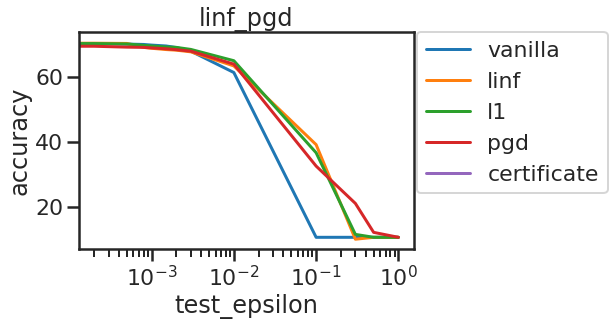

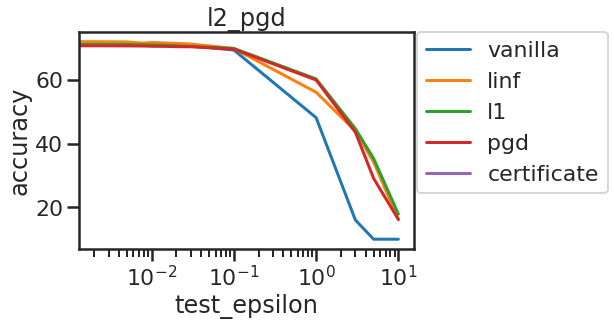

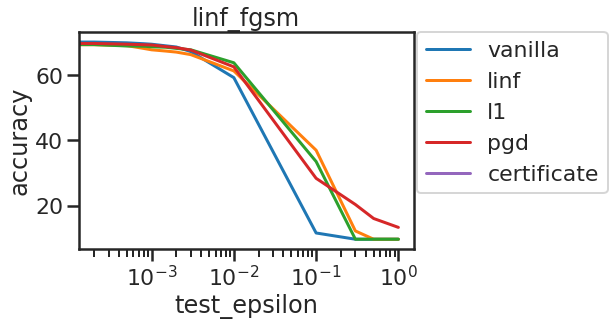

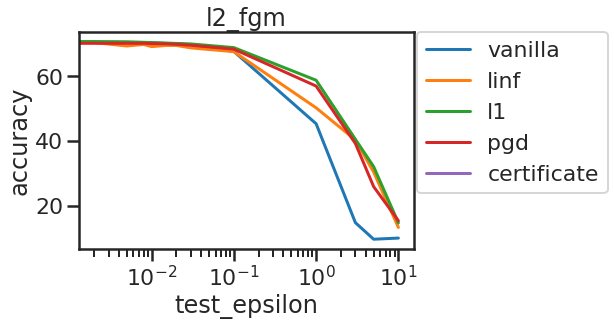

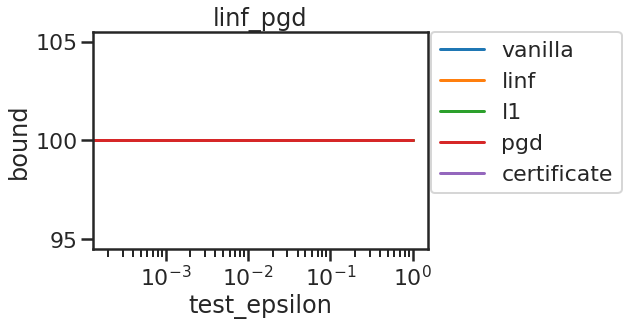

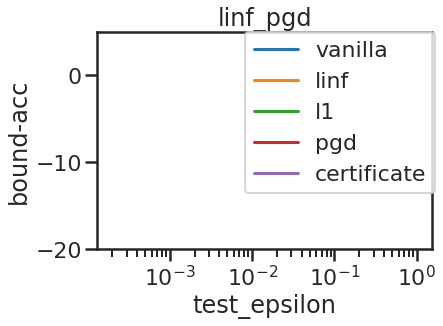

In [81]:
for attack in name_attacks:#[name_attacks[0]]:
    plt.figure()
    sns.lineplot(x="test_epsilon", y="accuracy",
                 hue="robust_training", hue_order=['vanilla', 'linf', 'l1','pgd','certificate'], palette="tab10",
                 data=df_results[(df_results.attack==attack)]).set_title(attack)
    plt.xscale('log')
    #plt.ylim([0,55])
    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

for attack in [name_attacks[0]]:
    plt.figure()
    sns.lineplot(x="test_epsilon", y="bound",
                 hue="robust_training", hue_order=['vanilla', 'linf', 'l1','pgd','certificate'], palette="tab10",
                 data=df_results[(df_results.attack==attack)]).set_title(attack)
    plt.xscale('log')
    #plt.ylim([0,55])
    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
    
df_results['bound-acc'] = df_results['bound'] - df_results['accuracy']
for attack in [name_attacks[0]]:
    plt.figure()
    sns.lineplot(x="test_epsilon", y="bound-acc",
                 hue="robust_training", hue_order=['vanilla', 'linf', 'l1','pgd','certificate'], palette="tab10",
                 data=df_results[(df_results.attack==attack)]).set_title(attack)
    plt.xscale('log')
    plt.ylim([-20,5])
    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [17]:
#UCI
if not os.path.isfile('/vast/robustness/datasets/UCI/datasets_info.csv'):
    import json
    datasets = []
    for data_set in range(20,66):
        with open('/vast/robustness/configs_datasets/' + str(data_set) + '.json') as config_file:
            config = json.load(config_file)
            tmpX = np.shape(np.genfromtxt('/vast/robustness/datasets/UCI/imp_' + config["name_file"] 
                                 + '_' + "trainX.csv", delimiter=','))
            config["num_examples"] = tmpX[0]
            config["num_features"] = tmpX[1]
            datasets.append(config)
    df = pd.DataFrame(datasets) 
    df.to_csv('/vast/robustness/datasets/UCI/datasets_info.csv')
else:
    df = pd.read_csv('/vast/robustness/datasets/UCI/datasets_info.csv')

name_attacks = ["linf_pgd","l2_pgd", "linf_fgsm", "l2_fgm"]

list_entries = []
for cv_epsilon in range(13):
    
    for idx_dd in range(20,66):

        dd = df[df.dataset_id==idx_dd].iloc[0]
        # Hash table of parameters
        parameters = {"epsilon": {}, "backbone": {}, "initial_learning_rate": {}, 
                      "robust_training": {}, "l1_robustness": {}, "certificate": {}, "epsilon_pgd_training":{}}


        to_exclude = []
        experiment_list_tmp = [element for i, element in enumerate(experiment_list) if i not in to_exclude]
        for exp in experiment_list_tmp:
            if not exp["data_set"]==dd.dataset_id:
                continue

            for kk in parameters.keys():
                if exp[kk] in parameters[kk]:
                    parameters[kk][exp[kk]].append(int(exp["model_name"]))
                else:
                    parameters[kk][exp[kk]] = [int(exp["model_name"])]


        # For all methods, do cross-val and create an entry of the results
        backbones = ['OneLayer', 'OneLayer+pgd']
        robust_trainings = ['none','linf','l1', 'certificate']

        for backbone in backbones:
            for robust_training in robust_trainings:
                if (backbone == 'Madry' and robust_training == True) or \
                    (backbone == 'CNN+clipping' and robust_training == False):
                    continue

                
                    
                if robust_training=='none':
                    ids = list(set(parameters["backbone"][backbone]) & 
                               set(parameters["robust_training"][False]))
                elif robust_training=='linf':
                    ids = list(set(parameters["backbone"][backbone]) & 
                               set(parameters["robust_training"][True])&
                              set(parameters["l1_robustness"][False])&
                            set(parameters["certificate"][False]))
                elif robust_training=='l1':
                    ids = list(set(parameters["backbone"][backbone]) & 
                            set(parameters["robust_training"][True])&
                            set(parameters["l1_robustness"][True])&
                            set(parameters["certificate"][False]))
                elif robust_training=='certificate':
                    ids = list(set(parameters["backbone"][backbone]) & 
                            set(parameters["robust_training"][True])&
                            set(parameters["l1_robustness"][True])&
                            set(parameters["certificate"][True]))
                    
                if backbone == 'MLP+pgd' and robust_training == True:
                    continue

                if ids == []:
                    continue
                #print(ids)

                # Cross-validation among learning rates and epsilons:
                best_acc = 0.0
                best_id = -1
                for id in ids:
                    acc = 0.0
                    for attack in [name_attacks[0]]:
                        file_name = results_dir + experiment_list[id]['model_name'] + '/results/acc_' + 'val' + '_' + attack + '.pkl'
                        if not os.path.isfile(file_name):
                            print("Missing!! " + file_name)
                            continue
                        with open(file_name, 'rb') as f:
                            tmp = pickle.load(f)

                        ave_acc = 0.0
                        for test_epsilon in list(tmp.keys())[cv_epsilon:cv_epsilon+1]:
                            ave_acc += tmp[test_epsilon]
                        ave_acc = ave_acc / len(tmp.keys())
                        acc += ave_acc
                    acc = acc / 2
                    if acc>best_acc:
                        best_id = id
                        best_acc = acc

                entry = {"learning_rate": experiment_list[best_id]['initial_learning_rate'],
                        "backbone": experiment_list[best_id]['backbone'],
                        "robust_training": robust_training,
                        "epsilon": experiment_list[best_id]['epsilon'],
                        "epsilon_pgd_training": experiment_list[best_id]['epsilon_pgd_training'],
                        "num_features": dd.num_features,
                        "num_examples": dd.num_examples,
                        "dataset_name": dd.name_file}

                dataset = "test"
                for attack in [name_attacks[0]]:
                    entry["dataset"] = dd.dataset_id - 20
                    entry["attack"] = attack
                    entry["experiment_id"] = best_id

                    if not backbone == 'Madry':
                        with open(results_dir + experiment_list[best_id]['model_name'] + 
                                  '/results/training_time.pkl', 'rb') as f:
                            tmp = pickle.load(f)
                        entry["images_per_second"] = np.mean(tmp) 
                        entry["std_images_per_second"] = np.std(tmp) 

                    with open(results_dir + experiment_list[best_id]['model_name'] + '/results/acc_' + dataset + '_' + 
                        attack + '.pkl', 'rb') as f:
                        tmp = pickle.load(f)

                    for test_epsilon in list(tmp.keys())[cv_epsilon:cv_epsilon+1]:
                        entry["test_epsilon"] = test_epsilon
                        entry["accuracy"] =  100*tmp[test_epsilon]
                        list_entries.append(entry.copy())

df_results = pd.DataFrame.from_dict(list_entries) 




Missing!! /vast/robustness/onelayer/1108/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2271/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2425/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2900/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3244/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3338/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3583/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3984/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4462/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4564/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4684/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/5416/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/5886/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/5887/results/acc_val_linf_pgd.pkl
Missing!! /vast/robu

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Missing!! /vast/robustness/onelayer/7934/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/7935/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/1108/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2271/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2425/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2900/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3244/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3338/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3583/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3984/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4462/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4564/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4684/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/5416/results/acc_val_linf_pgd.pkl
Missing!! /vast/robu

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Missing!! /vast/robustness/onelayer/7934/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/7935/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/1108/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2271/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2425/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2900/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3244/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3338/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3583/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3984/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4462/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4564/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4684/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/5416/results/acc_val_linf_pgd.pkl
Missing!! /vast/robu

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Missing!! /vast/robustness/onelayer/7934/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/7935/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/1108/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2271/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2425/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2900/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3244/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3338/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3583/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3984/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4462/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4564/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4684/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/5416/results/acc_val_linf_pgd.pkl
Missing!! /vast/robu

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Missing!! /vast/robustness/onelayer/7934/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/7935/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/1108/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2271/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2425/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2900/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3244/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3338/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3583/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3984/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4462/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4564/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4684/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/5416/results/acc_val_linf_pgd.pkl
Missing!! /vast/robu

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Missing!! /vast/robustness/onelayer/7934/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/7935/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/1108/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2271/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2425/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2900/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3244/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3338/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3583/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/3984/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4462/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4564/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/4684/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/5416/results/acc_val_linf_pgd.pkl
Missing!! /vast/robu

Missing!! /vast/robustness/onelayer/5416/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/5886/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/5887/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/6009/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/6822/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/6873/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/6874/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/7491/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/7934/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/7935/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/1108/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2271/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2425/results/acc_val_linf_pgd.pkl
Missing!! /vast/robustness/onelayer/2900/results/acc_val_linf_pgd.pkl
Missing!! /vast/robu

In [18]:
set(df_results[df_results.dataset==1].attack)

{'linf_pgd'}

In [19]:

win_pgd = []
win_robust = []

df_final = df_results.groupby(['backbone', 'robust_training', 'dataset','test_epsilon']).mean().reset_index()

df_final["winner"] = False
df_final["tie"] = False
df_final["accuracy_normal"] = 0

plot_entries = []
for attack in name_attacks:
    list(set(df_final.test_epsilon))
    for cv_epsilon in list(set(df_final.test_epsilon)):
        for idx_dd in range(0,46):
            xx = df_final[(df_final.dataset == idx_dd)&(df_final.test_epsilon==cv_epsilon)]
            df_final.loc[(df_final.dataset == idx_dd)&(df_final.test_epsilon==cv_epsilon),
                         "accuracy_normal"] = xx.accuracy / xx.accuracy.max()
            winners = df_final[ (df_final.dataset == idx_dd)&(df_final.test_epsilon==cv_epsilon)
                               & (df_final.accuracy_normal >= 0.95)]
            #if len(winners)==1:    
            df_final.loc[(df_final.dataset == idx_dd)&(df_final.test_epsilon==cv_epsilon) & (df_final.accuracy_normal>=0.95), "winner"] = True
            df_final.loc[(df_final.dataset == idx_dd)&(df_final.test_epsilon==cv_epsilon) & (df_final.accuracy_normal<0.95), "winner"] = False

            #else:
            #    df_final.loc[(df_final.dataset == idx_dd)&(df_final.test_epsilon==cv_epsilon) & (df_final.accuracy_normal >=  0.95), "tie"] = True
        
        
        plot_entries.append({"epsilon": cv_epsilon,
                        "backbone": 'pgd',
                        "attack": attack,
                        "num_wins": len(list(df_final[(df_final.backbone=='OneLayer+pgd') & (df_final.robust_training == 'none')&(df_final.test_epsilon==cv_epsilon)
                                     & (df_final.winner)].dataset))})
        plot_entries.append({"epsilon": cv_epsilon,
                "backbone": 'vanilla',
                "attack": attack,
                "num_wins": len(list(df_final[(df_final.backbone=='OneLayer') & (df_final.robust_training == 'none')&(df_final.test_epsilon==cv_epsilon)
                             & (df_final.winner)].dataset))})
        
        plot_entries.append({"epsilon": cv_epsilon,
                "backbone": 'l1',
                "attack": attack,
                "num_wins": len(list(df_final[(df_final.backbone=='OneLayer') & (df_final.robust_training == 'l1')&(df_final.test_epsilon==cv_epsilon)
                             & (df_final.winner)].dataset))})
        plot_entries.append({"epsilon": cv_epsilon,
                "backbone": 'linf',
                "attack": attack,
                "num_wins": len(list(df_final[(df_final.backbone=='OneLayer') & (df_final.robust_training == 'linf')&(df_final.test_epsilon==cv_epsilon)
                             & (df_final.winner)].dataset))})
        
        plot_entries.append({"epsilon": cv_epsilon,
                "backbone": 'certificate',
                "attack": attack,
                "num_wins": len(list(df_final[(df_final.backbone=='OneLayer') & (df_final.robust_training == 'certificate')&(df_final.test_epsilon==cv_epsilon)
                             & (df_final.winner)].dataset))})
                    
        
        win_pgd.append(len(list(df_final[(df_final.backbone=='OneLayer+pgd') & (df_final.robust_training == 'none')&(df_final.test_epsilon==cv_epsilon)
                                     & (df_final.winner)].dataset)))
        win_robust.append(len(list(df_final[(df_final.backbone=='OneLayer') & (df_final.robust_training == 'linf')&(df_final.test_epsilon==cv_epsilon)
                                        & (df_final.winner)].dataset)))
df_plot = pd.DataFrame.from_dict(plot_entries) 

#winner_pgd_list.append(win_pgd)
#winner_robust_list.append(win_robust)

In [20]:
df_plot

epsilon     backbone    attack  num_wins
0     0.0000          pgd  linf_pgd        44
1     0.0000      vanilla  linf_pgd        40
2     0.0000           l1  linf_pgd        40
3     0.0000         linf  linf_pgd        46
4     0.0000  certificate  linf_pgd        40
..       ...          ...       ...       ...
255   0.0005          pgd    l2_fgm        44
256   0.0005      vanilla    l2_fgm        34
257   0.0005           l1    l2_fgm        34
258   0.0005         linf    l2_fgm        44
259   0.0005  certificate    l2_fgm        34

[260 rows x 4 columns]

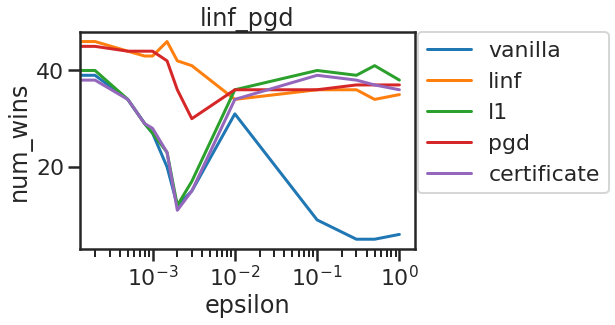

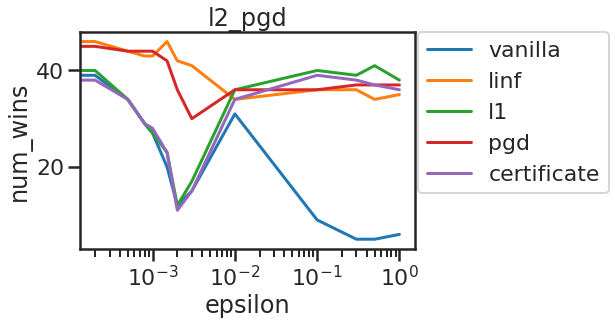

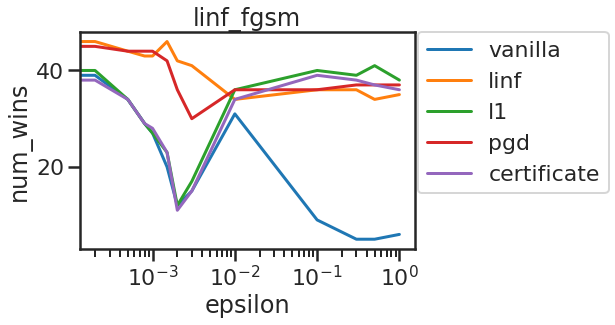

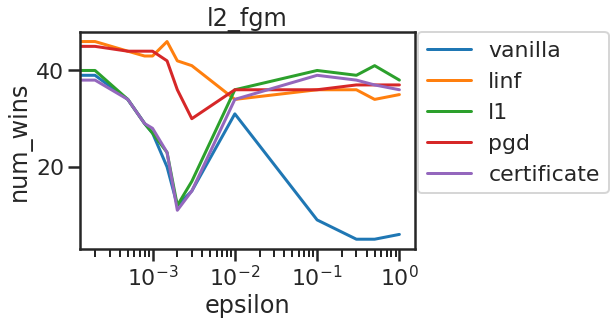

In [21]:
for attack in name_attacks:
    plt.figure()
    sns.lineplot(x="epsilon", y="num_wins",
                 hue="backbone",  hue_order=['vanilla', 'linf', 'l1','pgd','certificate'],  palette="tab10", 
                 data=df_plot[(df_plot.attack==attack)]).set_title(attack)
    plt.xscale('log')
    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

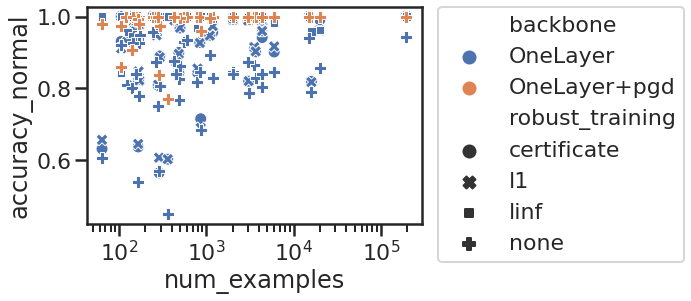

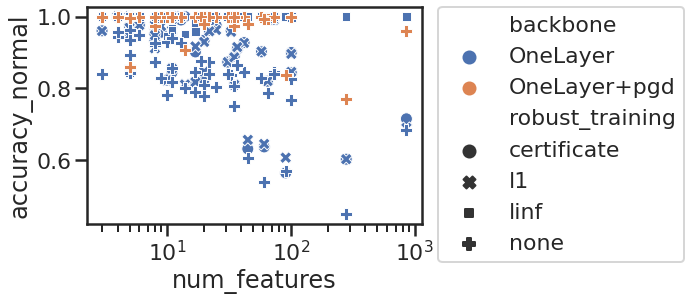

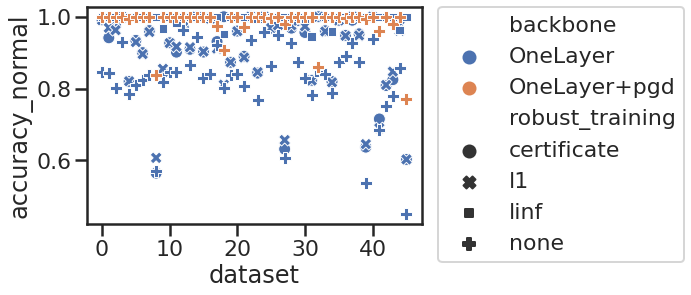

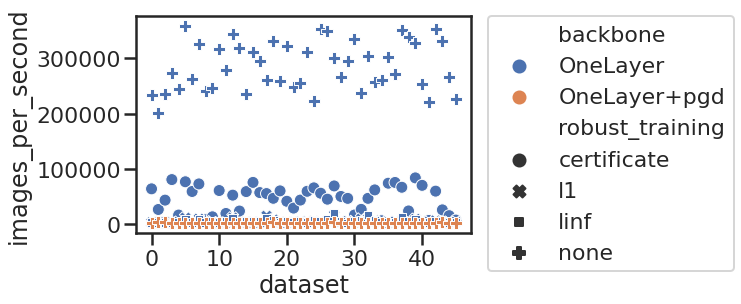

In [25]:
df_final = df_results.groupby(['backbone', 'robust_training', 'dataset']).mean().reset_index()
for idx_dd in range(0,46):
    xx = df_final[df_final.dataset == idx_dd]
    df_final.loc[df_final.dataset == idx_dd, "accuracy_normal"] = xx.accuracy / xx.accuracy.max()

        
plt.figure()
sns.scatterplot(data=df_final, x="num_examples",y="accuracy_normal",hue="backbone",style="robust_training")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xscale('log')

plt.figure()
sns.scatterplot(data=df_final, x="num_features",y="accuracy_normal",hue="backbone",style="robust_training")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xscale('log')

plt.figure()
sns.scatterplot(data=df_final, x="dataset",y="accuracy_normal",hue="backbone",style="robust_training")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure()
sns.scatterplot(data=df_final[~((df_final.robust_training==False)&(df_final.backbone=='MLP'))], 
                x="dataset",y="images_per_second",hue="backbone",style="robust_training")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [12]:
list_entries = []

# Hash table of parameters
parameters = {"epsilon": {}, "backbone": {}, "initial_learning_rate": {}, 
              "robust_training": {}, "epsilon_pgd_training":{}}

to_exclude = []
experiment_list_tmp = [element for i, element in enumerate(experiment_list) if i not in to_exclude]
for exp in experiment_list_tmp:

    for kk in parameters.keys():
        if exp[kk] in parameters[kk]:
            parameters[kk][exp[kk]].append(int(exp["model_name"]))
        else:
            parameters[kk][exp[kk]] = [int(exp["model_name"])]

# For all methods, do cross-val and create an entry of the results
backbones = ['OneLayer', 'OneLayer+pgd']
robust_trainings = [True,False]

for backbone in backbones:
    for robust_training in robust_trainings:
        
        if backbone == 'OneLayer+pgd':
            eps = parameters['epsilon_pgd_training'].keys()
        else:
            eps = parameters['epsilon'].keys()
            
        for ep in eps: #for each epsilon in training:
            
            if (backbone == 'Madry' and robust_training == True) or \
                (backbone == 'CNN+clipping' and robust_training == False):
                continue

            ids = list(set(parameters["backbone"][backbone]) & set(parameters["robust_training"][robust_training]))

            if backbone == 'OneLayer+pgd':
                ids = list(set(ids) & set(parameters["epsilon_pgd_training"][ep]) )
            else:
                ids = list(set(ids) & set(parameters["epsilon"][ep]) )
            
            if ids == []:
                continue

            # Cross-validation among learning rates and epsilons:
            best_acc = -1.0
            best_id = ids[0]
            for id in ids:
                file_name = results_dir + experiment_list[id]['model_name'] + '/results/acc_' + 'val' + '_' + name_attacks[0] + '.pkl'
                if not os.path.isfile(file_name):
                    print("Missing!! " + file_name)
                    continue
                with open(file_name, 'rb') as f:
                    tmp = pickle.load(f)

                acc = tmp[0.0]
                if acc>best_acc:
                    best_id = id
                    best_acc = acc

            entry = {"learning_rate": experiment_list[best_id]['initial_learning_rate'],
                    "backbone": experiment_list[best_id]['backbone'],
                    "robust_training": experiment_list[best_id]['robust_training'],
                    "epsilon": experiment_list[best_id]['epsilon'],
                    "epsilon_pgd_training": experiment_list[best_id]['epsilon_pgd_training']}

            dataset = "test"
            entry["attack"] = name_attacks[0]
            entry["experiment_id"] = best_id

            with open(results_dir + experiment_list[best_id]['model_name'] + '/results/acc_' + dataset + '_' + 
                name_attacks[0] + '.pkl', 'rb') as f:
                tmp = pickle.load(f)


            entry["train_epsilon"] = ep
            entry["accuracy"] =  100*tmp[0.0]
            list_entries.append(entry.copy())

df_results = pd.DataFrame.from_dict(list_entries) 

Missing!! /vast/robustness/onelayer/134/results/acc_val_linf_pgd.pkl


In [13]:
df_results

learning_rate      backbone  robust_training   epsilon  \
0         0.00010      OneLayer             True   0.10000   
1         0.00010      OneLayer             True   0.00010   
2         0.00010      OneLayer             True   0.00001   
3         0.00010      OneLayer             True   0.00100   
4         0.00010      OneLayer             True   0.01000   
5         0.00010      OneLayer             True   1.00000   
6         0.00100      OneLayer             True  10.00000   
7         0.00010      OneLayer            False   0.10000   
8         0.00100  OneLayer+pgd            False  10.00000   
9         0.00010  OneLayer+pgd            False  10.00000   
10        0.00010  OneLayer+pgd            False  10.00000   
11        0.00010  OneLayer+pgd            False  10.00000   
12        0.00100  OneLayer+pgd            False  10.00000   
13        0.00001  OneLayer+pgd            False  10.00000   

    epsilon_pgd_training    attack  experiment_id  train_epsilon   accuracy  
0                0.10000  linf_pgd            125        0.10000  47.265625  
1                0.10000  linf_pgd             56        0.00010  46.718750  
2                0.10000  linf_pgd             24        0.00001  46.757812  
3                0.10000  linf_pgd             58        0.00100  46.757812  
4                0.10000  linf_pgd             26        0.01000  47.617188  
5                0.10000  linf_pgd            126        1.00000  47.031250  
6                0.10000  linf_pgd            120       10.00000  48.906250  
7                0.10000  linf_pgd              3        0.10000  46.640625  
8                0.10000  linf_pgd             86        0.10000  44.960938  
9                0.00010  linf_pgd             88        0.00010  46.796875  
10               0.00001  linf_pgd             89        0.00001  46.640625  
11               0.00100  linf_pgd             90        0.00100  46.914062  
12               0.01000  linf_pgd             85        0.01000  46.601562  
13               1.00000  linf_pgd             99        1.00000  17.187500

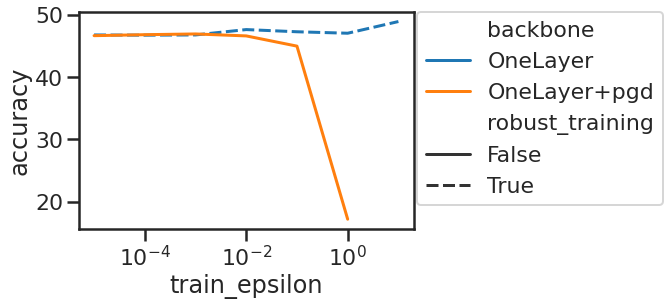

In [14]:
plt.figure()
sns.lineplot(x="train_epsilon", y="accuracy",
             hue="backbone",  style='robust_training', palette="tab10",
             data=df_results[(df_results.attack==name_attacks[0])])
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

[1536, 1543, 1550, 1522, 1529]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


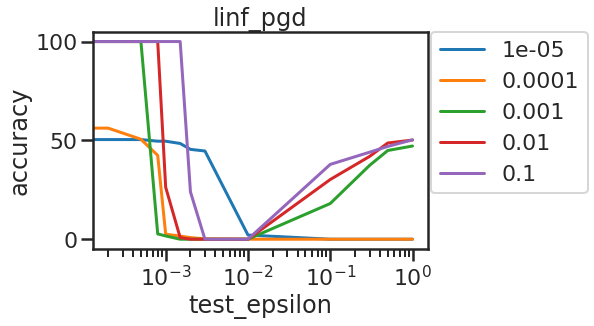

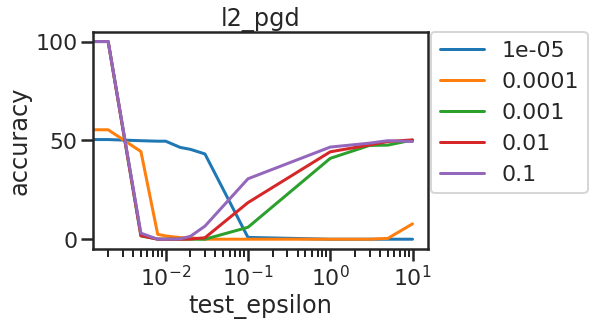

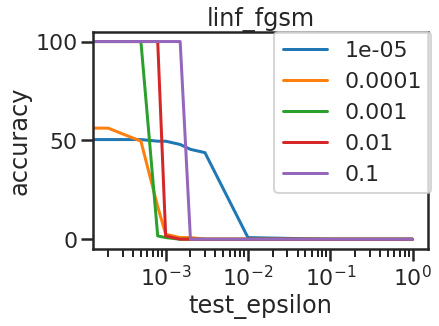

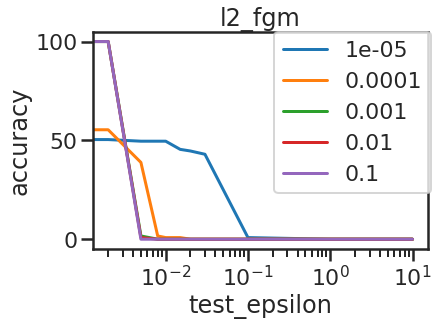

In [44]:
# Display learning rate impact
epsilon = 1e-3
backbone = 'OneLayer'
robust_training = True
epsilon_pgd_training = 0.1
type_robust_training = 'l1'

# Hash table of parameters
parameters = {"epsilon": {}, "backbone": {}, "initial_learning_rate": {}, 
              "robust_training": {}, "l1_robustness": {}, "certificate": {}, "epsilon_pgd_training":{}}

to_exclude = []
experiment_list_tmp = [element for i, element in enumerate(experiment_list) if i not in to_exclude]
for exp in experiment_list_tmp:
    if not exp['data_set'] == 26: 
        continue

    for kk in parameters.keys():
        if exp[kk] in parameters[kk]:
            parameters[kk][exp[kk]].append(int(exp["model_name"]))
        else:
            parameters[kk][exp[kk]] = [int(exp["model_name"])]
                    
if robust_training:
    if type_robust_training=='linf':
        ids = list(set(parameters["backbone"][backbone]) & 
                set(parameters["robust_training"][True])&
                set(parameters["l1_robustness"][False])&
                set(parameters["certificate"][False])&
                set(parameters["epsilon"][epsilon]))
    elif type_robust_training=='l1':
        ids = list(set(parameters["backbone"][backbone]) & 
                set(parameters["robust_training"][True])&
                set(parameters["l1_robustness"][True])&
                set(parameters["certificate"][False])&
                set(parameters["epsilon"][epsilon]))
    elif type_robust_training=='certificate':
        ids = list(set(parameters["backbone"][backbone]) & 
                set(parameters["robust_training"][True])&
                set(parameters["l1_robustness"][True])&
                set(parameters["certificate"][True])&
                set(parameters["epsilon"][epsilon]))
else:
    ids = list(set(parameters["backbone"][backbone]) &
            set(parameters["robust_training"][robust_training]) & 
            set(parameters["epsilon_pgd_training"][epsilon_pgd_training]))

print(ids)
list_entries = []
for id in ids:
    entry = {"learning_rate": experiment_list[id]['initial_learning_rate'],
            "backbone": experiment_list[id]['backbone'],
            "robust_training": experiment_list[id]['robust_training'],
            "epsilon": experiment_list[id]['epsilon']}
 
    for dataset in ["val", "test"]:
        for attack in name_attacks:
            entry["dataset"] = dataset
            entry["attack"] = attack
            with open(results_dir + experiment_list[id]['model_name'] + '/results/acc_' + dataset + '_' + 
                attack + '.pkl', 'rb') as f:
                tmp = pickle.load(f)
            
            for test_epsilon in tmp.keys():
                entry["test_epsilon"] = test_epsilon
                entry["accuracy"] =  100*tmp[test_epsilon]
                list_entries.append(entry.copy())
                
df = pd.DataFrame.from_dict(list_entries) 
for attack in name_attacks:
    plt.figure()
    sns.lineplot(x="test_epsilon", y="accuracy",
                 hue="learning_rate",  palette="tab10",
                 data=df[df.dataset=='test'][df.attack==attack]).set_title(attack)
    plt.xscale('log')
    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)


In [30]:
# Display epsilon
backbones = ['MLP+pgd']
robust_training = False
epsilon_pgd_training = 1e-3

list_entries = []
for backbone in backbones:
    for epsilon in list(parameters["epsilon"].keys()):

            
        if robust_training:
            ids = list(set(parameters["backbone"][backbone]) & set(parameters["epsilon"][epsilon]) &
                       set(parameters["robust_training"][robust_training])
                      & set(parameters["epsilon_pgd_training"][epsilon_pgd_training]))
        else:
            ids = list(set(parameters["backbone"][backbone]) &
                    set(parameters["robust_training"][robust_training])
                      & set(parameters["epsilon_pgd_training"][epsilon_pgd_training]))
            
        if len(ids)==0:
            continue
            
        # Cross-validation among learning rates:
        best_acc = 0.0
        best_id = -1
        for id in ids:
            acc = 0.0
            for attack in name_attacks:
                with open(results_dir + experiment_list[id]['model_name'] + '/results/acc_' + 'val' + '_' + 
                    attack + '.pkl', 'rb') as f:
                    tmp = pickle.load(f)
                
                ave_acc = 0.0
                for test_epsilon in list(tmp.keys())[:2]:
                    ave_acc += tmp[test_epsilon]
                ave_acc = ave_acc / len(tmp.keys())
                acc += ave_acc
            acc = acc / 2
            if acc>best_acc:
                best_id = id
                best_acc = acc
                
        print(best_id)
        entry = {"learning_rate": experiment_list[best_id]['initial_learning_rate'],
                "backbone": experiment_list[best_id]['backbone'],
                "robust_training": experiment_list[best_id]['robust_training'],
                "epsilon": experiment_list[best_id]['epsilon']}

        dataset = "test"
        for attack in name_attacks:
            entry["dataset"] = dataset
            entry["attack"] = attack
            with open(results_dir + experiment_list[best_id]['model_name'] + '/results/acc_' + dataset + '_' + 
                attack + '.pkl', 'rb') as f:
                tmp = pickle.load(f)

            for test_epsilon in tmp.keys():
                entry["test_epsilon"] = test_epsilon
                entry["accuracy"] =  100*tmp[test_epsilon]
                list_entries.append(entry.copy())
                
df = pd.DataFrame.from_dict(list_entries) 

for attack in name_attacks:
    plt.figure()
    sns.lineplot(x="test_epsilon", y="accuracy",
                 hue="epsilon",  style='backbone', palette="tab10",
                 data=df[df.attack==attack]).set_title(attack)
    plt.xscale('log')
    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)


KeyError: 'MLP+pgd'

[1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399]
1376
[1365, 1366, 1367, 1368, 1369]
1366
[1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407]
1408


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


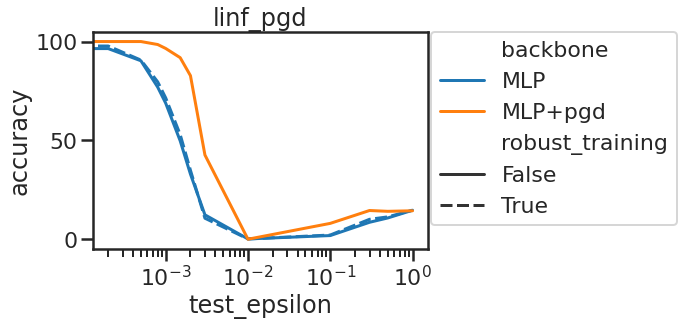

<Figure size 432x288 with 0 Axes>

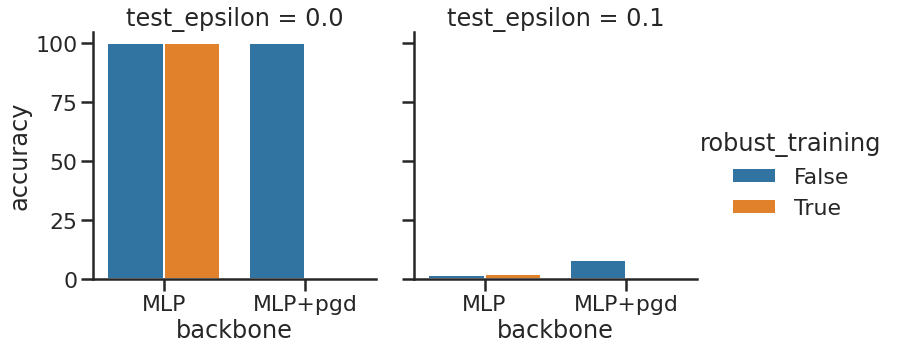

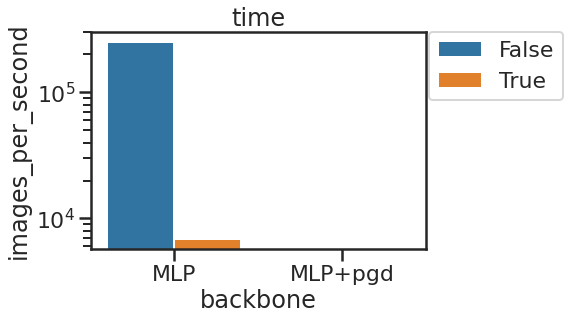

In [60]:
# Display best
backbones = ['MLP', 'MLP+pgd']
robust_trainings = [True,False]

list_entries = []
for backbone in backbones:
    for robust_training in robust_trainings:
        if (backbone == 'Madry' and robust_training == True) or \
            (backbone == 'CNN+clipping' and robust_training == False):
            continue
            
        ids = list(set(parameters["backbone"][backbone]) & set(parameters["robust_training"][robust_training]))
        
        if backbone == 'MLP+pgd' and robust_training == True:
            continue
            
        if ids == []:
            continue
        print(ids)
        
        # Cross-validation among learning rates:
        best_acc = 0.0
        best_id = -1
        for id in ids:
            #if (experiment_list[id]['backbone'] == 'CNN+pgd') and experiment_list[id]["epsilon_pgd_training"] == 0.3:
            #    continue 
            acc = 0.0
            for attack in [name_attacks[0]]:
                with open(results_dir + experiment_list[id]['model_name'] + '/results/acc_' + 'val' + '_' + 
                    attack + '.pkl', 'rb') as f:
                    tmp = pickle.load(f)
                
                ave_acc = 0.0
                for test_epsilon in list(tmp.keys())[0:1]:
                    ave_acc += tmp[test_epsilon]
                ave_acc = ave_acc / len(tmp.keys())
                acc += ave_acc
            acc = acc / 2
            if acc>best_acc:
                best_id = id
                best_acc = acc

        entry = {"learning_rate": experiment_list[best_id]['initial_learning_rate'],
                "backbone": experiment_list[best_id]['backbone'],
                "robust_training": experiment_list[best_id]['robust_training'],
                "epsilon": experiment_list[best_id]['epsilon']}

        dataset = "test"
        print(best_id)
        for attack in name_attacks:
            entry["dataset"] = dataset
            entry["attack"] = attack
            
            if not backbone == 'Madry':
                with open(results_dir + experiment_list[best_id]['model_name'] + 
                          '/results/training_time.pkl', 'rb') as f:
                    tmp = pickle.load(f)
                entry["images_per_second"] = np.mean(tmp) 
                entry["std_images_per_second"] = np.std(tmp) 
                
            with open(results_dir + experiment_list[best_id]['model_name'] + '/results/acc_' + dataset + '_' + 
                attack + '.pkl', 'rb') as f:
                tmp = pickle.load(f)

            for test_epsilon in tmp.keys():
                entry["test_epsilon"] = test_epsilon
                entry["accuracy"] =  100*tmp[test_epsilon]
                list_entries.append(entry.copy())
                  
df = pd.DataFrame.from_dict(list_entries) 

for attack in [name_attacks[0]]:
    plt.figure()
    sns.lineplot(x="test_epsilon", y="accuracy",
                 hue="backbone",  style='robust_training', palette="tab10",
                 data=df[df.attack==attack]).set_title(attack)
    plt.xscale('log')
    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

    plt.figure()
    epsilon = 0.1
    if attack == "l2_pgd" or attack == "l2_fgm" :
        epsilon = 1
    sns.catplot(x="backbone", y="accuracy",
                 hue="robust_training", col="test_epsilon", palette="tab10",kind="bar",
                 data=df[(df.test_epsilon == 0)| (df.test_epsilon == epsilon)][df.attack==attack])
    #plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

plt.figure()
sns.barplot(x="backbone", y="images_per_second",
             hue="robust_training", palette="tab10",
             data=df).set_title("time")
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
df[(df.test_epsilon==0.01)&(df.attack=='linf_pgd')]

In [87]:
df[df.backbone=="Madry"][df.attack=="linf_pgd"][df.test_epsilon == 0.3 ]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


learning_rate backbone  robust_training  epsilon dataset    attack  \
218          0.001    Madry             True      0.1    test  linf_pgd   
270          0.001    Madry             True      0.1    test  linf_pgd   

     test_epsilon   accuracy  images_per_second  std_images_per_second  
218           0.3  93.515625                NaN                    NaN  
270           0.3  93.515625                NaN                    NaN

In [107]:
df[df.backbone=="Madry"][df.attack=="linf_fgsm"][df.test_epsilon == 0.3 ]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


learning_rate backbone  robust_training  epsilon dataset     attack  \
244          0.001    Madry             True      0.1    test  linf_fgsm   
296          0.001    Madry             True      0.1    test  linf_fgsm   

     test_epsilon   accuracy  images_per_second  std_images_per_second  
244           0.3  95.507812                NaN                    NaN  
296           0.3  95.507812                NaN                    NaN